In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#인라인은 박스의 반대말 -> 한줄 안에 다 넣어버리겠다

In [476]:
raw_data = pd.read_csv('hospital_train.csv', encoding='UTF-8')

In [477]:
raw_data

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,1.171868e+10,1.198567e+08,0.0,8.715369e+09,1.520004e+09,0.000000e+00,7.195366e+09,5.930000e+09,5.973889e+09,1.406028e+09
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,5.419756e+09,6.795734e+07,0.0,6.249466e+09,2.050342e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,4.441451e+09,0.000000e+00,73742310.0,5.804268e+08,7.507060e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [478]:
tmp = []
for each in raw_data['OC']:
    if each == 'open':
        tmp.append(1)
    elif each == 'close':
        tmp.append(0)
    else:
        tmp.append(np.nan)

In [479]:
raw_data['OC'] = tmp #tmp : 0과 1로 된걸 반영시킴
raw_data

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1
0,1,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09
1,3,1,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00
3,7,1,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09
4,9,1,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,1.171868e+10,1.198567e+08,0.0,8.715369e+09,1.520004e+09,0.000000e+00,7.195366e+09,5.930000e+09,5.973889e+09,1.406028e+09
297,423,0,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
298,426,0,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,5.419756e+09,6.795734e+07,0.0,6.249466e+09,2.050342e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00
299,427,0,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,4.441451e+09,0.000000e+00,73742310.0,5.804268e+08,7.507060e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [480]:
raw_data = raw_data.dropna() #결측치 처리

In [481]:
raw_data.info() #데이터 항목 타입 보여줌

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 299
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             288 non-null    int64  
 1   OC                  288 non-null    int64  
 2   sido                288 non-null    object 
 3   sgg                 288 non-null    int64  
 4   openDate            288 non-null    int64  
 5   bedCount            288 non-null    float64
 6   instkind            288 non-null    object 
 7   revenue1            288 non-null    float64
 8   salescost1          288 non-null    float64
 9   sga1                288 non-null    float64
 10  salary1             288 non-null    float64
 11  noi1                288 non-null    float64
 12  noe1                288 non-null    float64
 13  interest1           288 non-null    float64
 14  ctax1               288 non-null    float64
 15  profit1             288 non-null    float64
 16  liquidAs

In [482]:
raw_data.corr() #상관도 = 공분산 : 두개의 상관도가 있는것에 따라 그래프를 그림 (상향선이든 하향선이든)

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1
inst_id,1.000000,-0.075129,0.090179,0.118934,-0.174541,-0.138278,-0.099088,-0.144937,-0.137086,0.028890,...,-0.199938,-0.182169,0.103634,-0.261613,-0.466401,-0.713925,-0.070364,-0.112598,0.030889,0.013047
OC,-0.075129,1.000000,-0.061026,-0.081177,-0.068971,0.061107,0.038568,0.062520,0.052220,0.013052,...,0.019363,0.058254,-0.296212,0.042121,0.023563,0.088720,0.038069,0.003404,0.004443,0.000258
sgg,0.090179,-0.061026,1.000000,0.025446,0.018767,0.059916,0.035834,0.056820,0.050360,0.073846,...,0.073985,0.066059,0.102163,0.096499,0.111482,0.069898,0.080781,0.072646,0.007614,-0.031186
openDate,0.118934,-0.081177,0.025446,1.000000,0.021866,-0.282899,-0.176388,-0.300987,-0.323230,-0.204537,...,-0.165316,-0.214744,0.012742,-0.221938,-0.230215,-0.171619,-0.170790,0.010396,-0.136822,-0.090216
bedCount,-0.174541,-0.068971,0.018767,0.021866,1.000000,0.289082,0.078792,0.349943,0.404217,0.201880,...,0.362251,0.138420,0.018199,0.316835,0.331541,0.243236,0.266507,0.199130,0.198790,-0.030614
revenue1,-0.138278,0.061107,0.059916,-0.282899,0.289082,1.000000,0.765888,0.948690,0.887381,0.487511,...,0.722685,0.624377,-0.031473,0.786732,0.759199,0.350559,0.667391,0.307265,0.668606,0.330347
salescost1,-0.099088,0.038568,0.035834,-0.176388,0.078792,0.765888,1.000000,0.532329,0.444699,0.294075,...,0.385793,0.492041,-0.013772,0.455410,0.467063,0.152356,0.365504,0.060778,0.427851,0.140298
sga1,-0.144937,0.062520,0.056820,-0.300987,0.349943,0.948690,0.532329,1.000000,0.964946,0.492285,...,0.769158,0.591214,-0.028393,0.813817,0.778351,0.396108,0.695473,0.364823,0.668783,0.360282
salary1,-0.137086,0.052220,0.050360,-0.323230,0.404217,0.887381,0.444699,0.964946,1.000000,0.506209,...,0.801773,0.516745,-0.025557,0.805053,0.732825,0.389831,0.722943,0.361012,0.646999,0.310225
noi1,0.028890,0.013052,0.073846,-0.204537,0.201880,0.487511,0.294075,0.492285,0.506209,1.000000,...,0.420520,0.233330,-0.010964,0.473384,0.266845,0.054428,0.550973,0.157758,0.313870,0.094445


In [483]:
raw_data = raw_data.loc[:, ['OC', 'sido', 'openDate', 'instkind', 'revenue1', 'debt1', 'netAsset1', 'surplus1']]

In [484]:
raw_data

,OC,sido,openDate,instkind,revenue1,debt1,netAsset1,surplus1
0,1,choongnam,20071228,nursing_hospital,4.217530e+09,6.828260e+08,2.844460e+09,1.496394e+09
2,1,gyeonggi,20161228,nursing_hospital,1.004522e+09,9.241434e+07,3.005088e+08,0.000000e+00
3,1,incheon,20000814,general_hospital,7.250734e+10,4.236380e+10,1.385710e+10,8.643659e+09
4,1,gyeongnam,20050901,general_hospital,4.904354e+10,4.989811e+10,8.631164e+07,9.025550e+09
5,1,gyeongnam,20020501,general_hospital,3.358054e+10,0.000000e+00,0.000000e+00,3.664918e+09
...,...,...,...,...,...,...,...,...
293,1,gyeonggi,20120312,hospital,4.303270e+09,4.942362e+09,2.978770e+09,0.000000e+00
294,1,gyeongnam,20101104,nursing_hospital,1.207963e+10,8.097221e+09,9.544034e+09,0.000000e+00
295,1,gyeonggi,20110523,nursing_hospital,5.500472e+09,4.478687e+09,4.583514e+09,0.000000e+00
296,1,jeonnam,20050211,nursing_hospital,7.614697e+09,8.715369e+09,5.973889e+09,1.406028e+09


In [485]:
# raw_data.rename(columns={'OC': '개/폐업', 'sido': '시도', 'openDate' : '개업일', 'instkind' : '종류', 'revenue1' : '매출액', 'debt1' : '부채', 'netAsset1' : '순자산', 'surplus1' : '총잉여'}, inplace=True)

In [486]:
raw_data.describe() #수치적으로 요약해서 보여줌

,OC,openDate,revenue1,debt1,netAsset1,surplus1
count,288.000000,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02
mean,0.961806,2.005114e+07,1.306200e+10,8.867236e+09,6.248946e+09,1.341368e+09
std,0.191999,8.800124e+04,2.056349e+10,1.294447e+10,1.263823e+10,8.301426e+09
min,0.000000,1.978012e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2.002026e+07,3.275423e+09,1.996405e+09,1.404705e+09,0.000000e+00
50%,1.000000,2.007121e+07,5.597118e+09,4.460969e+09,3.133682e+09,0.000000e+00
75%,1.000000,2.011087e+07,1.322539e+10,9.687514e+09,6.288057e+09,3.048251e+08
max,1.000000,2.017061e+07,1.510000e+11,8.669725e+10,1.390000e+11,1.340000e+11


In [487]:
raw_data.head()

,OC,sido,openDate,instkind,revenue1,debt1,netAsset1,surplus1
0,1,choongnam,20071228,nursing_hospital,4.217530e+09,6.828260e+08,2.844460e+09,1.496394e+09
2,1,gyeonggi,20161228,nursing_hospital,1.004522e+09,9.241434e+07,3.005088e+08,0.000000e+00
3,1,incheon,20000814,general_hospital,7.250734e+10,4.236380e+10,1.385710e+10,8.643659e+09
4,1,gyeongnam,20050901,general_hospital,4.904354e+10,4.989811e+10,8.631164e+07,9.025550e+09
5,1,gyeongnam,20020501,general_hospital,3.358054e+10,0.000000e+00,0.000000e+00,3.664918e+09


In [488]:
raw_data['OC'].value_counts() #병원 OPEN / CLOSE 계업

1    277
0     11
Name: OC, dtype: int64

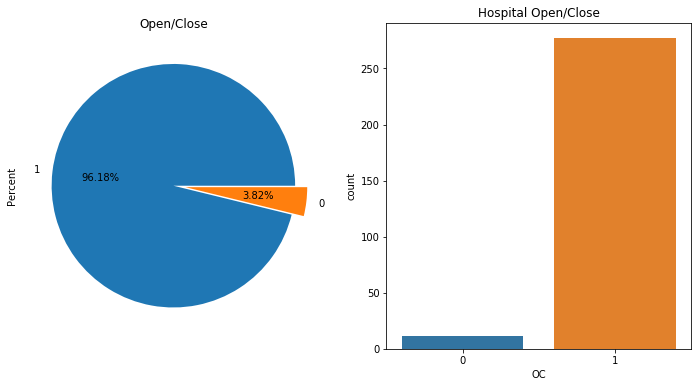

In [489]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['OC'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])

#autopct는 소수점을 어떻게 할 것인가 소수점 2째짜리까지, ax = 0번째 그래프에 넣음
ax[0].set_title('Open/Close')
ax[0].set_ylabel('Percent') #ylabe은 y 타이틀 정해주는것임

#countplot은 막대그래프를 그림, data는 데이터프레임을 넣어줌
sns.countplot('OC', data=raw_data,ax=ax[1])
ax[1].set_title('Hospital Open/Close')
plt.show()

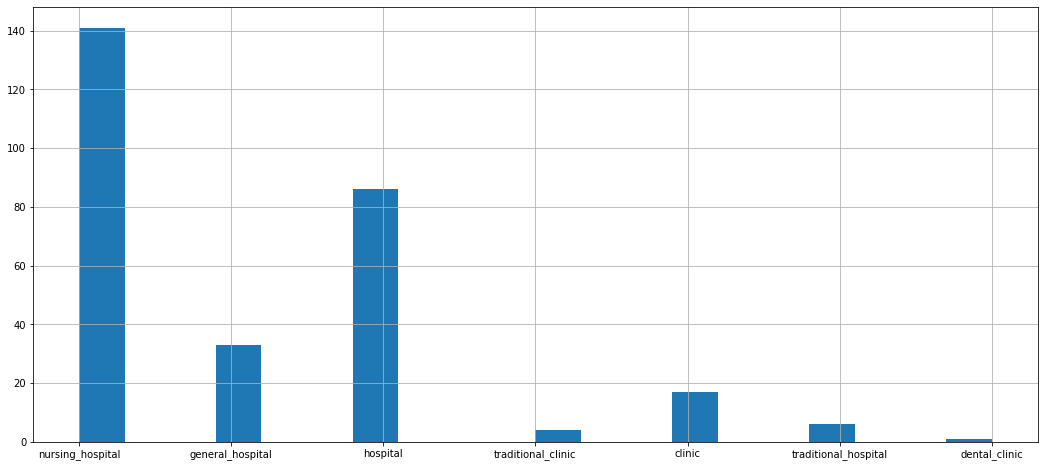

In [490]:
#병원 종류별 그래프
raw_data['instkind'].hist(bins=20, figsize=(18,8))

In [491]:
raw_data.groupby('instkind').mean()

,OC,openDate,revenue1,debt1,netAsset1,surplus1
instkind,,,,,,
clinic,0.941176,2.004072e+07,1.731472e+10,5.704193e+09,4.563650e+09,6.135745e+07
dental_clinic,1.000000,2.012050e+07,1.547254e+10,1.280543e+10,6.421645e+09,0.000000e+00
general_hospital,0.969697,1.996934e+07,4.170918e+10,2.871629e+10,1.576332e+10,2.872058e+09
hospital,0.965116,2.002342e+07,1.360816e+10,8.882080e+09,7.100305e+09,2.618747e+09
nursing_hospital,0.964539,2.008914e+07,6.041756e+09,4.966387e+09,4.009473e+09,4.629845e+08
traditional_clinic,0.750000,2.009049e+07,6.754148e+09,2.343909e+09,1.752625e+09,0.000000e+00
traditional_hospital,1.000000,1.999695e+07,4.404154e+09,3.809069e+09,2.088450e+09,0.000000e+00


In [492]:
raw_data.corr() #상관도 = 공분산 : 두개의 상관도가 있는것에 따라 그래프를 그림 (상향선이든 하향선이든)

,OC,openDate,revenue1,debt1,netAsset1,surplus1
OC,1.000000,-0.081177,0.061107,0.042121,0.004443,0.000258
openDate,-0.081177,1.000000,-0.282899,-0.221938,-0.136822,-0.090216
revenue1,0.061107,-0.282899,1.000000,0.786732,0.668606,0.330347
debt1,0.042121,-0.221938,0.786732,1.000000,0.502167,0.132970
netAsset1,0.004443,-0.136822,0.668606,0.502167,1.000000,0.660802
surplus1,0.000258,-0.090216,0.330347,0.132970,0.660802,1.000000


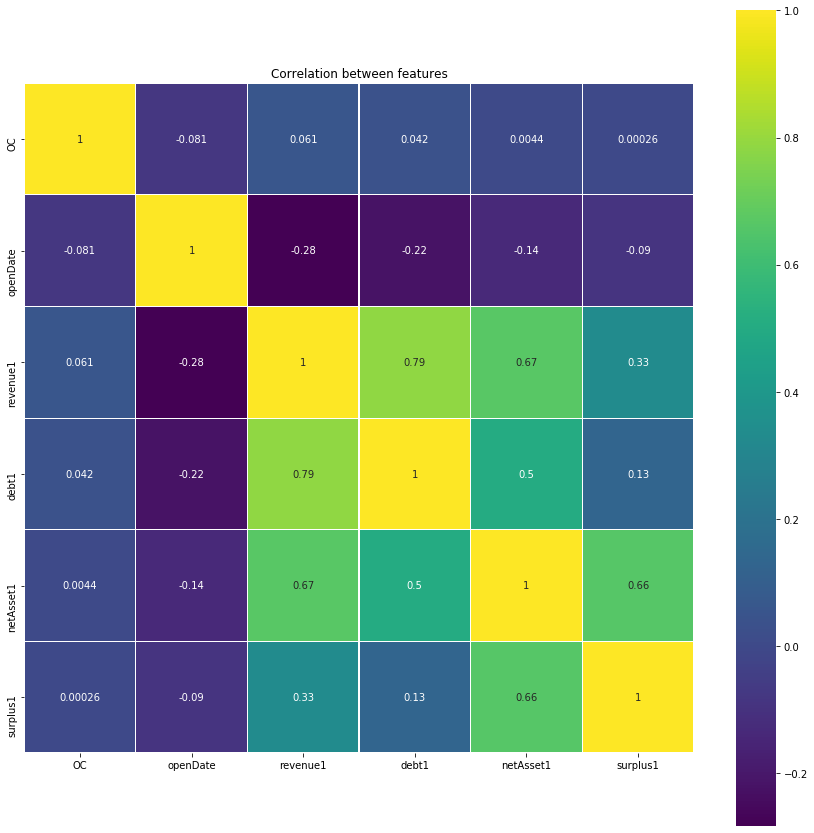

In [493]:
#히트맵 -> 상관도 시각화

plt.figure(figsize=(15, 15))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [494]:
#부채와 매출액은 높은 상관관계를 갖는다. 
#순자산과 매출액은 높은 상관관계를 갖는다.
#총잉여와
#debt1, revenue1, netAsset1

In [495]:
raw_data

,OC,sido,openDate,instkind,revenue1,debt1,netAsset1,surplus1
0,1,choongnam,20071228,nursing_hospital,4.217530e+09,6.828260e+08,2.844460e+09,1.496394e+09
2,1,gyeonggi,20161228,nursing_hospital,1.004522e+09,9.241434e+07,3.005088e+08,0.000000e+00
3,1,incheon,20000814,general_hospital,7.250734e+10,4.236380e+10,1.385710e+10,8.643659e+09
4,1,gyeongnam,20050901,general_hospital,4.904354e+10,4.989811e+10,8.631164e+07,9.025550e+09
5,1,gyeongnam,20020501,general_hospital,3.358054e+10,0.000000e+00,0.000000e+00,3.664918e+09
...,...,...,...,...,...,...,...,...
293,1,gyeonggi,20120312,hospital,4.303270e+09,4.942362e+09,2.978770e+09,0.000000e+00
294,1,gyeongnam,20101104,nursing_hospital,1.207963e+10,8.097221e+09,9.544034e+09,0.000000e+00
295,1,gyeonggi,20110523,nursing_hospital,5.500472e+09,4.478687e+09,4.583514e+09,0.000000e+00
296,1,jeonnam,20050211,nursing_hospital,7.614697e+09,8.715369e+09,5.973889e+09,1.406028e+09


In [496]:
X_train = raw_data.iloc[:, 4:8] #학습데이터
X_train

,revenue1,debt1,netAsset1,surplus1
0,4.217530e+09,6.828260e+08,2.844460e+09,1.496394e+09
2,1.004522e+09,9.241434e+07,3.005088e+08,0.000000e+00
3,7.250734e+10,4.236380e+10,1.385710e+10,8.643659e+09
4,4.904354e+10,4.989811e+10,8.631164e+07,9.025550e+09
5,3.358054e+10,0.000000e+00,0.000000e+00,3.664918e+09
...,...,...,...,...
293,4.303270e+09,4.942362e+09,2.978770e+09,0.000000e+00
294,1.207963e+10,8.097221e+09,9.544034e+09,0.000000e+00
295,5.500472e+09,4.478687e+09,4.583514e+09,0.000000e+00
296,7.614697e+09,8.715369e+09,5.973889e+09,1.406028e+09


In [497]:
y_train = raw_data['OC'] #학습데이터 -> 정답(개폐업 할지 )
y_train

0      1
2      1
3      1
4      1
5      1
      ..
293    1
294    1
295    1
296    1
299    0
Name: OC, Length: 288, dtype: int64

In [498]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.2, 
                                                    random_state=13)
#사이킷런으로 학습데이터, 결론데이터 / 내 학습데이터, 내 결론 데이터 나눔

In [499]:
X_train

,revenue1,debt1,netAsset1,surplus1
266,5.244736e+09,0.000000e+00,0.000000e+00,0.000000e+00
245,9.065734e+10,2.867871e+10,2.849826e+10,6.881412e+08
194,1.727599e+10,6.267388e+09,1.115605e+10,3.239523e+09
230,2.115853e+08,0.000000e+00,0.000000e+00,0.000000e+00
133,4.631822e+09,8.208113e+09,6.679717e+09,0.000000e+00
...,...,...,...,...
252,6.211947e+10,1.910209e+10,4.276063e+10,1.093054e+08
237,3.880362e+09,1.926988e+09,4.347739e+09,0.000000e+00
18,6.857076e+09,0.000000e+00,0.000000e+00,7.242267e+08
80,6.017543e+09,4.141693e+09,5.339729e+09,1.829241e+09


In [500]:
x_test

,revenue1,debt1,netAsset1,surplus1
0,6.682486e+10,6.769090e+10,6.295769e+09,8.944587e+09
1,3.495758e+10,6.626737e+10,1.470447e+10,1.046277e+10
2,2.326031e+10,0.000000e+00,0.000000e+00,1.638540e+10
3,0.000000e+00,2.891880e+10,4.702837e+10,0.000000e+00
4,5.037025e+10,4.921637e+10,2.268194e+10,1.492691e+10
...,...,...,...,...
122,2.233031e+10,1.582736e+10,1.554179e+10,0.000000e+00
123,1.833906e+10,1.938710e+09,9.554694e+09,8.116873e+09
124,1.424266e+10,0.000000e+00,0.000000e+00,0.000000e+00
125,4.892710e+10,3.859089e+10,1.212281e+09,0.000000e+00


In [501]:
y_train

266    1
245    1
194    1
230    1
133    1
      ..
252    1
237    1
18     1
80     1
182    1
Name: OC, Length: 230, dtype: int64

In [502]:
y_test

219    1
154    1
58     1
74     1
167    1
217    1
77     1
106    1
67     1
10     1
33     1
165    1
279    1
148    1
142    1
247    1
207    1
96     1
37     1
283    1
85     1
113    1
8      1
164    1
161    1
15     1
261    0
104    1
13     1
249    1
63     1
263    1
222    1
204    1
116    1
246    1
49     1
54     1
73     1
86     1
187    1
169    1
25     1
56     1
98     1
88     1
146    1
120    1
294    1
46     1
277    1
215    1
284    1
212    0
124    1
84     1
276    1
107    1
Name: OC, dtype: int64

In [503]:
x_test

,revenue1,debt1,netAsset1,surplus1
0,6.682486e+10,6.769090e+10,6.295769e+09,8.944587e+09
1,3.495758e+10,6.626737e+10,1.470447e+10,1.046277e+10
2,2.326031e+10,0.000000e+00,0.000000e+00,1.638540e+10
3,0.000000e+00,2.891880e+10,4.702837e+10,0.000000e+00
4,5.037025e+10,4.921637e+10,2.268194e+10,1.492691e+10
...,...,...,...,...
122,2.233031e+10,1.582736e+10,1.554179e+10,0.000000e+00
123,1.833906e+10,1.938710e+09,9.554694e+09,8.116873e+09
124,1.424266e+10,0.000000e+00,0.000000e+00,0.000000e+00
125,4.892710e+10,3.859089e+10,1.212281e+09,0.000000e+00


In [504]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

#인덱스 정렬화

In [508]:
#의사결정 라이브러리
#머신러닝 학습데이터 -> X_train -> y_train(생존여부) / Decision Treee로 학습화시켜, 0과 1로 살 여부를 맞출 확률이 80%가 나옴.
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))
#머신러닝이 자체적으로 돌면서 X_train (나이,성별,등급 등 조건으로) -> y_train(0과 1에 대한 결과를 맞출 확률이 80% )

Score: 0.9782608695652174


In [509]:
#정확도 테스트
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test) #tree_clf 학습 모델 객체안에 X_test라는 내가 빼놓은 데이터를 넣어, y_pred(살 여부를 확인함!)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100) #y_test 는 내가 빼놓은 정답 데이터, (y_test / y_pred) * 100 = 

Test Accuracy is  96.55172413793103


In [511]:
# 병원 개폐업 모델 테스트 /  revenue, debt, netasset, surplus
gonziam = [100, 100, 3000, 300]

In [513]:
tree_clf.predict_proba([gonziam])
#0이 망할 확률, 1이 오픈할 확률

array([[0.04761905, 0.95238095]])

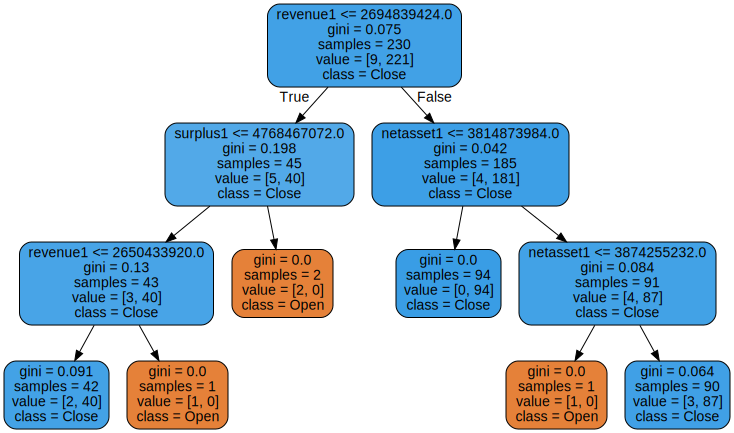

In [515]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="hospital.dot",
        feature_names=['revenue1', 'debt1', 'netasset1', 'surplus1'],
        class_names=['Open','Close'],
        rounded=True,
        filled=True
    )

import graphviz
with open("hospital.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='hospital', directory='images/decision_trees', cleanup=True)
dot

## 병원 개업/폐업 예측 분석 : surplus(이익), netasset(총자본), revenue(수입)으로 예측